### This notebook shows how to use Permutation Importnace using eli5 library and LGBM

Only 1% of data is used in this notebook while computing Permutation Importnace

In [19]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

pd.options.display.max_rows = 1000

In [6]:
sys.path.insert(0, "/opt/vssexclude/personal/kaggle/kaggle_tab_mar/src")

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import munging.process_data_util as process_data
import common.com_util as common
import config.constants as constants
import modeling.train_util as model

In [9]:
SEED = 42
EXP_DETAILS = "Permutation Importance with raw features"

TARGET = 'target'

MODEL_TYPE = "lgb"
OBJECTIVE = "binary"
BOOSTING_TYPE = "gbdt"
METRIC = "auc"
VERBOSE = 100
N_THREADS = -1
NUM_LEAVES = 31
MAX_DEPTH = -1
N_ESTIMATORS = 10000
LEARNING_RATE = 0.1
EARLY_STOPPING_ROUNDS = 100


lgb_params = {
                'objective': OBJECTIVE,
                'boosting_type': BOOSTING_TYPE,
                'learning_rate': LEARNING_RATE,
                'num_leaves': NUM_LEAVES,
                'tree_learner': 'serial',
                'n_jobs': N_THREADS,
                'seed': SEED,
                'max_depth': MAX_DEPTH,
                'max_bin': 255,
                'metric': METRIC,
                'verbose': -1,
                'n_estimators': N_ESTIMATORS
                }

LOGGER_NAME = 'main'
logger = common.get_logger(LOGGER_NAME)
common.set_seed(SEED)

train_df, test_df, sample_submission_df = process_data.read_processed_data(
    logger, constants.PROCESSED_DATA_DIR, train=True, test=True, sample_submission=True, frac=0.1)

combined_df = pd.concat([train_df.drop('target', axis=1), test_df])
target = train_df[TARGET]

cat_fetaures = [name for name in train_df.columns if "cat" in name]

logger.info("Label Encoding the categorcal features")
for name in cat_fetaures:
    lb = LabelEncoder()
    combined_df[name] = lb.fit_transform(combined_df[name])

train_df = combined_df.loc[train_df.index]
train_df[TARGET] = target

test_df = combined_df.loc[test_df.index]

train_X = train_df.drop([TARGET], axis=1)
train_Y = train_df[TARGET]
test_X = test_df

logger.info(f"Shape of train_X: {train_X.shape}, train_Y: {train_Y.shape}, test_X: {test_X.shape}")

predictors = list(train_X.columns)
logger.info(f"List of predictors {predictors}")

sk = StratifiedKFold(n_splits=5, shuffle=False)

permu_imp_df, top_imp_df = model.lgb_train_perm_importance_on_cv(logger,
                                                                 run_id=123,
                                                                 train_X=train_X,
                                                                 train_Y=train_Y,
                                                                 kf=sk,
                                                                 features=predictors,
                                                                 params=lgb_params,
                                                                 early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                                                                 cat_features=cat_fetaures,
                                                                 display_imp=True,
                                                                 verbose_eval=100,
                                                                )

[INFO]2021-03-19 16:23:46,429:main:Reading Data from /opt/vssexclude/personal/kaggle/kaggle_tab_mar/data/processed...
[INFO]2021-03-19 16:23:46,781:main:Shape of train_df : (30000, 31)
[INFO]2021-03-19 16:23:46,860:main:Shape of test_df : (20000, 30)
[INFO]2021-03-19 16:23:46,873:main:Shape of sample_submission_df : (20000, 1)
[INFO]2021-03-19 16:23:46,886:main:Label Encoding the categorcal features
[INFO]2021-03-19 16:23:47,042:main:Shape of train_X: (30000, 30), train_Y: (30000,), test_X: (20000, 30)
[INFO]2021-03-19 16:23:47,043:main:List of predictors ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']
[INFO]2021-03-19 16:23:47,048:main:Starting fold 1 of 5
Training until validation scores don't improve for 100 rounds


/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat0', 'cat1', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridd

[100]	training's auc: 0.949557	valid_1's auc: 0.884231
Early stopping, best iteration is:
[64]	training's auc: 0.93314	valid_1's auc: 0.884892


Weight,Feature
0.0711 ± 0.0041,cat16
0.0139 ± 0.0039,cat15
0.0134 ± 0.0052,cont5
0.0118 ± 0.0065,cat10
0.0115 ± 0.0054,cat8
0.0109 ± 0.0035,cat7
0.0108 ± 0.0029,cat14
0.0100 ± 0.0028,cat1
0.0082 ± 0.0026,cat0
0.0067 ± 0.0028,cat2


[INFO]2021-03-19 16:23:48,575:main:Starting fold 2 of 5
Training until validation scores don't improve for 100 rounds


/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat0', 'cat1', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridd

[100]	training's auc: 0.950892	valid_1's auc: 0.876359
Early stopping, best iteration is:
[54]	training's auc: 0.927799	valid_1's auc: 0.878079


Weight,Feature
0.0643 ± 0.0049,cat16
0.0196 ± 0.0025,cont5
0.0192 ± 0.0024,cat15
0.0159 ± 0.0043,cat10
0.0141 ± 0.0037,cat7
0.0132 ± 0.0051,cat14
0.0123 ± 0.0040,cat8
0.0116 ± 0.0052,cat1
0.0086 ± 0.0028,cat0
0.0082 ± 0.0011,cat2


[INFO]2021-03-19 16:23:50,592:main:Starting fold 3 of 5
Training until validation scores don't improve for 100 rounds


/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat0', 'cat1', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridd

[100]	training's auc: 0.950911	valid_1's auc: 0.877766
Early stopping, best iteration is:
[62]	training's auc: 0.9334	valid_1's auc: 0.877778


Weight,Feature
0.0621 ± 0.0049,cat16
0.0195 ± 0.0017,cat15
0.0158 ± 0.0034,cont5
0.0132 ± 0.0044,cat8
0.0128 ± 0.0047,cat10
0.0103 ± 0.0018,cat1
0.0099 ± 0.0035,cat7
0.0095 ± 0.0019,cat2
0.0084 ± 0.0034,cat14
0.0062 ± 0.0028,cat0


[INFO]2021-03-19 16:23:52,286:main:Starting fold 4 of 5
Training until validation scores don't improve for 100 rounds


/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat0', 'cat1', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridd

[100]	training's auc: 0.950282	valid_1's auc: 0.877935
Early stopping, best iteration is:
[65]	training's auc: 0.933957	valid_1's auc: 0.878846


Weight,Feature
0.0540 ± 0.0090,cat16
0.0190 ± 0.0021,cat15
0.0150 ± 0.0040,cat8
0.0122 ± 0.0055,cat1
0.0121 ± 0.0028,cat14
0.0111 ± 0.0054,cont5
0.0105 ± 0.0037,cat7
0.0096 ± 0.0048,cat10
0.0079 ± 0.0033,cat0
0.0067 ± 0.0022,cat18


[INFO]2021-03-19 16:23:53,841:main:Starting fold 5 of 5
Training until validation scores don't improve for 100 rounds


/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat0', 'cat1', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/arnabb/anaconda3/envs/py_k/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridd

[100]	training's auc: 0.949339	valid_1's auc: 0.884089
Early stopping, best iteration is:
[43]	training's auc: 0.918086	valid_1's auc: 0.885359


Weight,Feature
0.0698 ± 0.0070,cat16
0.0150 ± 0.0065,cat15
0.0130 ± 0.0031,cat14
0.0121 ± 0.0041,cat8
0.0114 ± 0.0026,cat1
0.0110 ± 0.0029,cont5
0.0097 ± 0.0062,cat7
0.0076 ± 0.0031,cat0
0.0072 ± 0.0017,cat18
0.0069 ± 0.0066,cat10


In [11]:
permu_imp_df.head()

,feature,weight,std,fold
0,cat16,0.071116,0.002037,1
1,cat15,0.013868,0.001973,1
2,cont5,0.013415,0.002580,1
3,cat10,0.011838,0.003251,1
4,cat8,0.011487,0.002677,1


In [12]:
top_imp_df.head()

,feature,weight
0,cat16,0.064275
1,cat15,0.017303
2,cont5,0.014185
3,cat8,0.012804
4,cat14,0.011526


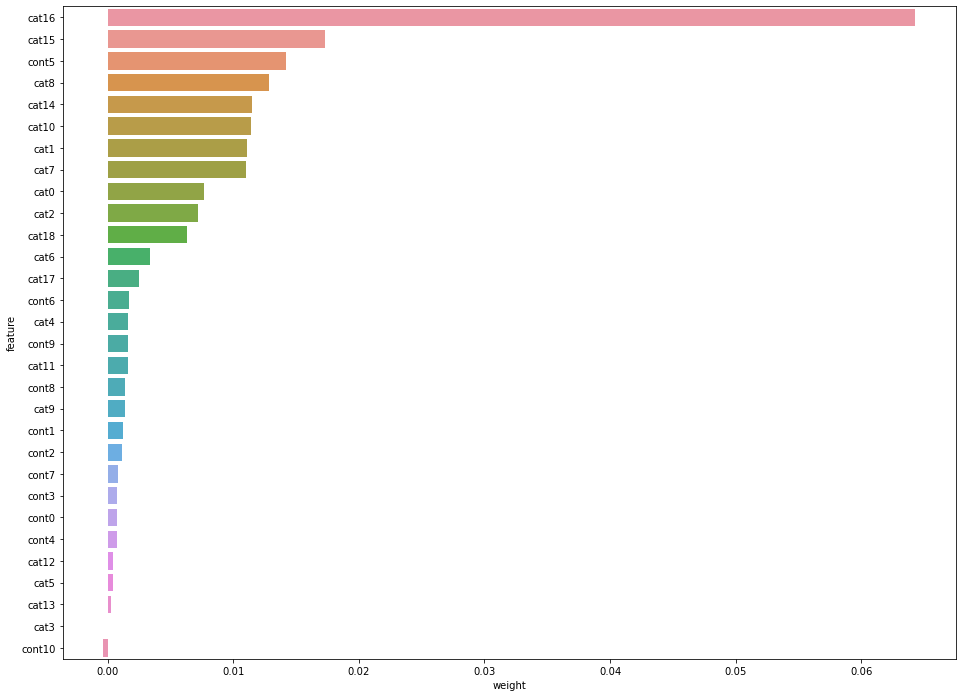

In [20]:
plt.figure(figsize=(16, 12))
sns.barplot(
    x="weight", y="feature", data=top_imp_df.sort_values(
        by="weight", ascending=False))
plt.show()